Step 1: Data Collection & Preprocessing

In [2]:
# Install required libraries
!pip install pandas matplotlib seaborn


In [3]:
import pandas as pd
from google.colab import drive
# drive.mount('/content/drive')

# Now load the dataset from your Drive path
file_path = '/content/drive/MyDrive/Data/hotel_bookings.csv'
df = pd.read_csv(file_path)
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


In [4]:
# Copy original dataframe to work on
df_clean = df.copy()

# Handling missing values
df_clean['children'].fillna(0, inplace=True)
df_clean.dropna(subset=['country'], inplace=True)
df_clean['agent'].fillna(0, inplace=True)
df_clean['company'].fillna(0, inplace=True)

# Convert reservation status date to datetime
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'], errors='coerce')

# Feature Engineering
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean['revenue'] = df_clean['adr'] * df_clean['total_nights']


<ipython-input-4-aecec448fb6a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['children'].fillna(0, inplace=True)
<ipython-input-4-aecec448fb6a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [5]:
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights,revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,Transient,0.0,0,0,Check-Out,2015-01-07,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0.0,0,Transient,75.0,0,0,Check-Out,2015-02-07,1,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0.0,0,Transient,98.0,0,1,Check-Out,2015-03-07,2,196.0


Step 2: Analytics & Reporting

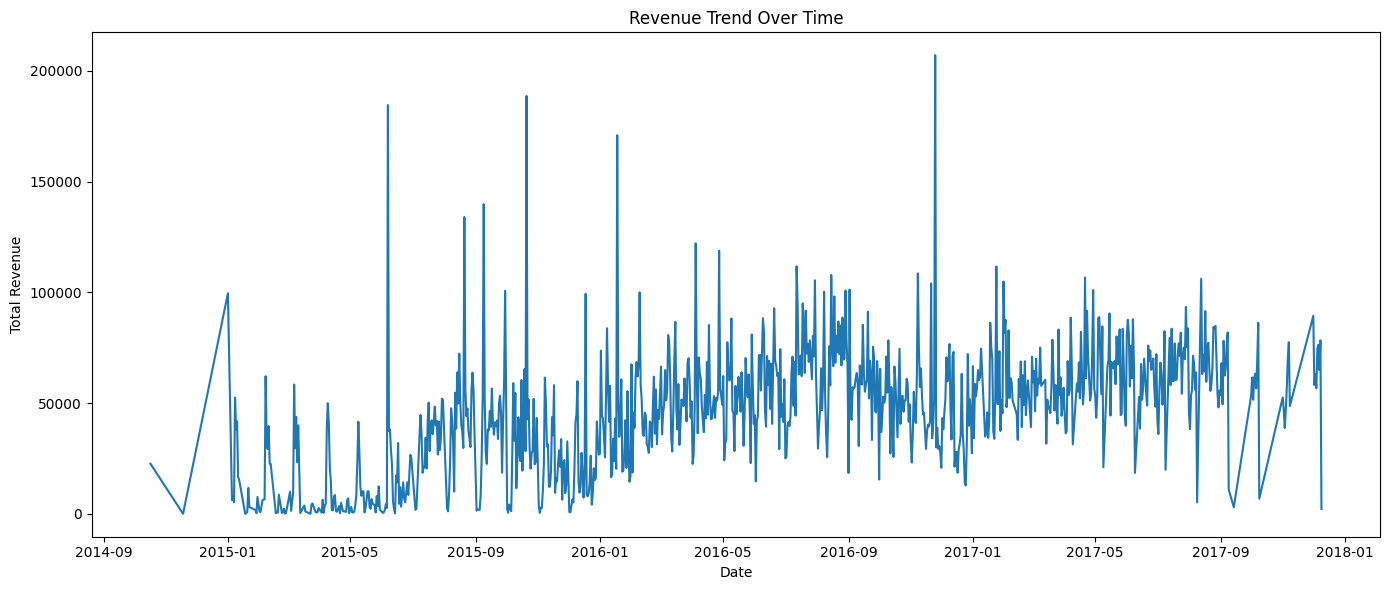

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and plot revenue by date
revenue_trend = df_clean.groupby('reservation_status_date')['revenue'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=revenue_trend, x='reservation_status_date', y='revenue')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


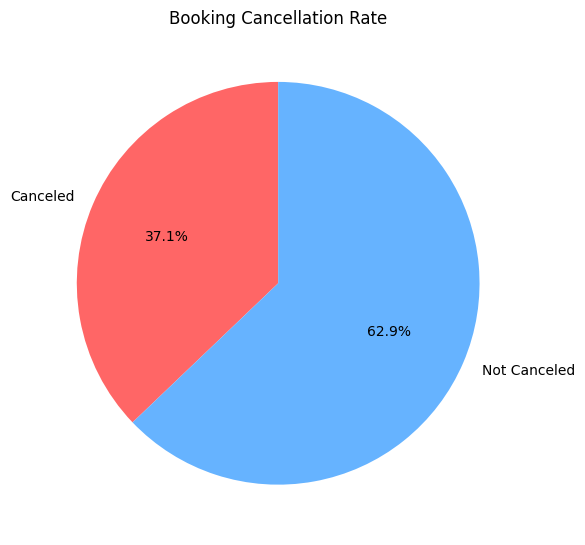

Cancellation Rate: 37.14%


In [7]:
# Compute cancellation rate
total_bookings = len(df_clean)
canceled_bookings = df_clean['is_canceled'].sum()
cancellation_rate = (canceled_bookings / total_bookings) * 100

# Plot
plt.figure(figsize=(6, 6))
plt.pie([cancellation_rate, 100 - cancellation_rate],
        labels=['Canceled', 'Not Canceled'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff6666', '#66b3ff'])
plt.title('Booking Cancellation Rate')
plt.tight_layout()
plt.show()

print(f"Cancellation Rate: {cancellation_rate:.2f}%")


<ipython-input-8-aa2d95bc3106>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=country_counts, x='Country', y='Bookings', palette='viridis')


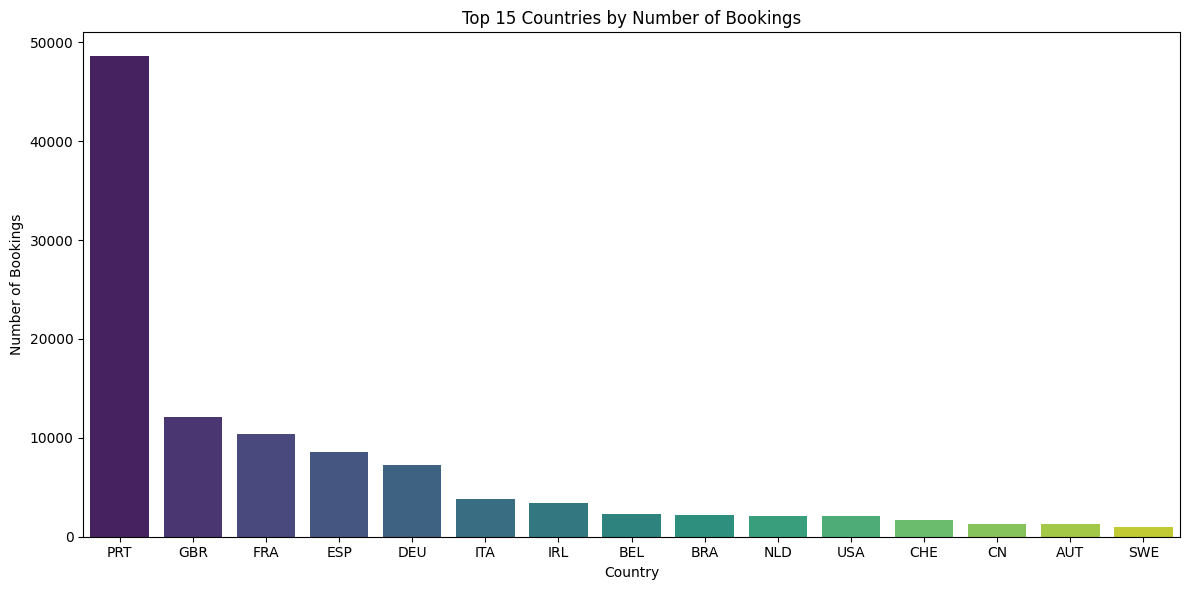

In [8]:
# Top 15 countries by number of bookings
country_counts = df_clean['country'].value_counts().head(15).reset_index()
country_counts.columns = ['Country', 'Bookings']

plt.figure(figsize=(12, 6))
sns.barplot(data=country_counts, x='Country', y='Bookings', palette='viridis')
plt.title('Top 15 Countries by Number of Bookings')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


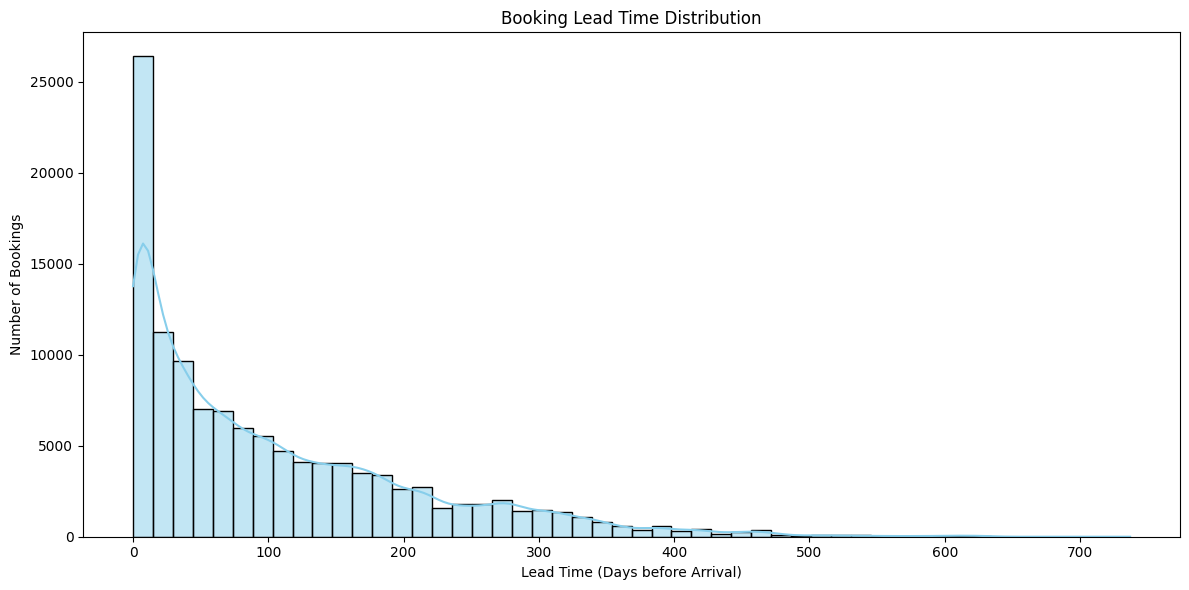

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['lead_time'], bins=50, kde=True, color='skyblue')
plt.title('Booking Lead Time Distribution')
plt.xlabel('Lead Time (Days before Arrival)')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()


Step 3: Retrieval-Augmented Question Answering (RAG)

In [10]:
!pip install faiss-cpu sentence-transformers transformers pandas ipython-sql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [11]:
import sqlite3
import pandas as pd

# Create a SQLite database inside Google Colab
db_path = "/content/drive/MyDrive/Data/hotel_bookings.db"
conn = sqlite3.connect(db_path)

# Create the 'bookings' table with all required columns
def create_table():
    conn.execute('''
        CREATE TABLE IF NOT EXISTS bookings (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            hotel TEXT,
            is_canceled INTEGER,
            lead_time INTEGER,
            arrival_date_year INTEGER,
            arrival_date_month TEXT,
            arrival_date_day_of_month INTEGER,
            stays_in_weekend_nights INTEGER,
            stays_in_week_nights INTEGER,
            adults INTEGER,
            children INTEGER,
            babies INTEGER,
            meal TEXT,
            country TEXT,
            market_segment TEXT,
            distribution_channel TEXT,
            is_repeated_guest INTEGER,
            previous_cancellations INTEGER,
            previous_bookings_not_canceled INTEGER,
            reserved_room_type TEXT,
            assigned_room_type TEXT,
            booking_changes INTEGER,
            deposit_type TEXT,
            agent TEXT,
            company TEXT,
            days_in_waiting_list INTEGER,
            customer_type TEXT,
            adr FLOAT,
            required_car_parking_spaces INTEGER,
            total_of_special_requests INTEGER,
            reservation_status TEXT,
            reservation_status_date TEXT,
            total_nights INTEGER,
            revenue FLOAT
        )
    ''')
    conn.commit()

# Create the table
create_table()
print("Table created successfully!")


Table created successfully!


In [12]:
# Function to append df_clean to SQLite database
def append_cleaned_data_to_db(df_clean):
    # Add 'total_nights' and 'revenue' columns if not already present
    if 'total_nights' not in df_clean.columns:
        df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

    if 'revenue' not in df_clean.columns:
        df_clean['revenue'] = df_clean['adr'] * df_clean['total_nights']

    # Append the cleaned data to the SQLite database
    df_clean.to_sql('hotel_bookings', conn, if_exists='append', index=False)
    print(f"{len(df_clean)} rows successfully appended to SQLite DB.")

# Example usage - Appending df_clean to DB
append_cleaned_data_to_db(df_clean)


118902 rows successfully appended to SQLite DB.


In [13]:
from sentence_transformers import SentenceTransformer
import faiss
import numpy as np
import pandas as pd
import sqlite3

#  Load sentence transformer model
model = SentenceTransformer('multi-qa-mpnet-base-dot-v1')

#  Convert row to meaningful text for FAISS
def convert_row_to_text(row):
    return f"Booking on {row['reservation_status_date']} at {row['hotel']} " \
           f"by guests from {row['country']} with {row['total_nights']} nights. " \
           f"Status: {'Canceled' if row['is_canceled'] else 'Checked Out'}, " \
           f"Revenue: ${row['revenue']:.2f}."

#  Load data from SQLite to create FAISS embeddings
def load_data_from_db(db_path="/content/drive/MyDrive/Data/hotel_bookings.db"):
    conn = sqlite3.connect(db_path)
    query = "SELECT * FROM hotel_bookings"
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df

#  Build and Save FAISS Embeddings (No Batch Processing)
def build_and_save_embeddings():
    df = load_data_from_db()
    texts = df.apply(convert_row_to_text, axis=1).tolist()

    #  Generate embeddings without batch processing
    embeddings = model.encode(texts, show_progress_bar=True)

    #  Save embeddings and texts to disk
    np.save("/content/drive/MyDrive/Data/embeddings.npy", embeddings)
    np.save("/content/drive/MyDrive/Data/embedded_texts.npy", np.array(texts, dtype=object))
    print(f" Embeddings and texts saved successfully!")

#  Run this cell to generate and save embeddings
build_and_save_embeddings()
print(" Embeddings generated and saved!")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.71k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/3716 [00:00<?, ?it/s]

 Embeddings and texts saved successfully!
 Embeddings generated and saved!


In [14]:
import faiss
import numpy as np

#  Load saved embeddings and texts
embeddings = np.load("/content/drive/MyDrive/Data/embeddings.npy")
embedded_texts = np.load("/content/drive/MyDrive/Data/embedded_texts.npy", allow_pickle=True).tolist()

#  Create FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))

print(" FAISS index created successfully using saved embeddings!")


 FAISS index created successfully using saved embeddings!


In [15]:
from transformers import pipeline
import pandas as pd

# Load a text generation pipeline
qa_pipeline = pipeline("text2text-generation", model="google/flan-t5-large")

# Query FAISS for descriptive + analytical queries
def ask_question_faiss(query, top_k=5):
    query_embedding = model.encode([query])
    distances, indices = index.search(np.array(query_embedding), top_k)

    # Retrieve matching rows
    retrieved_texts = [embedded_texts[i] for i in indices[0]]

    # Join retrieved rows for context
    context = " ".join(retrieved_texts)

    # Create a structured prompt for dynamic query answering
    prompt = f"""
    You are an expert analyst. Analyze the following booking data and answer the user's question accurately.

    Context:
    {context}

    Question:
    {query}

    Answer:
    """

    # Use LLM to generate the answer dynamically
    response = qa_pipeline(prompt, max_length=200, do_sample=False)[0]['generated_text']

    return response.strip()


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0


In [16]:
# Route Queries Dynamically Between SQL and FAISS
def route_query(query):
    """Classify query as analytical or descriptive."""
    analytical_keywords = ["rate", "percentage", "average", "revenue", "cancellation", "lead time", "total", "count", "number", "sum", "highest", "lowest", "mean"]

    # Dynamically check for analytical intent
    if any(keyword in query.lower() for keyword in analytical_keywords):
        return "analytical"
    return "descriptive"

# Final handler for answering any query
def get_final_answer(query):
    query_type = route_query(query)

    # Analytical and descriptive queries → FAISS + LLM
    if query_type in ["analytical", "descriptive"]:
        return ask_question_faiss(query)

    return "I couldn't determine the query type. Please ask a more specific question."

# Example Queries
print(get_final_answer("Show me total revenue for July 2017."))



Total revenue for July 2017 is $172.20.


Step 4: API Development

In [17]:
!pip install fastapi uvicorn nest-asyncio pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00


In [18]:
# Import necessary libraries
from pyngrok import ngrok
import nest_asyncio
import uvicorn
import threading
from fastapi import FastAPI
from pydantic import BaseModel
import json

# Set ngrok authtoken
ngrok.set_auth_token("<your-authtoken>")  # Replace with your actual authtoken


In [19]:
from fastapi import FastAPI
from pydantic import BaseModel
import sqlite3
import pandas as pd
from typing import List, Dict
from datetime import datetime

app = FastAPI()

# Define request models
class QueryRequest(BaseModel):
    question: str

# Define path for SQLite DB
DB_PATH = "/content/drive/MyDrive/Data/hotel_bookings.db"

#  Create 'chat_history' table if it doesn't exist
def create_chat_history_table():
    conn = sqlite3.connect(DB_PATH)
    conn.execute('''
        CREATE TABLE IF NOT EXISTS chat_history (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp TEXT,
            question TEXT,
            answer TEXT
        )
    ''')
    conn.commit()
    conn.close()

# Initialize table creation
create_chat_history_table()

#  Save query and response to chat history in SQLite
def save_to_chat_history(question, answer):
    conn = sqlite3.connect(DB_PATH)
    timestamp = datetime.now().isoformat()
    conn.execute('''
        INSERT INTO chat_history (timestamp, question, answer)
        VALUES (?, ?, ?)
    ''', (timestamp, question, answer))
    conn.commit()
    conn.close()

#  Fetch chat history from SQLite
def get_chat_history_from_db():
    conn = sqlite3.connect(DB_PATH)
    query = "SELECT timestamp, question, answer FROM chat_history ORDER BY id DESC"
    history_df = pd.read_sql_query(query, conn)
    conn.close()
    return history_df.to_dict(orient="records")

#  Clear chat history in SQLite
def clear_chat_history_db():
    conn = sqlite3.connect(DB_PATH)
    conn.execute("DELETE FROM chat_history")
    conn.commit()
    conn.close()

# Root API
@app.get("/")
def root():
    return {"message": "LLM Booking Analytics API is running."}

#  API to return booking analytics
@app.post("/analytics")
def analytics():
    total_revenue = df_clean['revenue'].sum()
    cancellation_rate = (df_clean['is_canceled'].sum() / len(df_clean)) * 100
    top_countries = df_clean['country'].value_counts().head(5).to_dict()
    avg_lead_time = df_clean['lead_time'].mean()

    return {
        "total_revenue": round(total_revenue, 2),
        "cancellation_rate_percent": round(cancellation_rate, 2),
        "top_countries": top_countries,
        "average_lead_time": round(avg_lead_time, 2)
    }

#  Enhanced /ask API to save chat history to DB
@app.post("/ask")
def ask_rag(request: QueryRequest):
    query = request.question
    response = ask_question_faiss(query)  # FAISS + LLM Query Handling
    save_to_chat_history(query, response.strip())
    return {"question": query, "answer": response.strip()}

#  Retrieve Chat History from SQLite
@app.get("/history")
def get_chat_history():
    history = get_chat_history_from_db()
    if not history:
        return {"message": "No chat history available yet!"}
    return {"chat_history": history}

#  Clear Chat History from SQLite
@app.delete("/history/clear")
def clear_chat_history():
    clear_chat_history_db()
    return {"message": "Chat history cleared successfully!"}

#  Health check for system dependencies
@app.get("/health")
def health_check():
    return {
        "status": "OK",
        "dependencies": {
            "faiss_index_size": index.ntotal,
            "embedding_model": "multi-qa-mpnet-base-dot-v1",
            "llm": "google/flan-t5-large"
        }
    }


In [20]:
# Apply nest_asyncio to run uvicorn without blocking other cells
nest_asyncio.apply()

# Expose the FastAPI app using ngrok
public_url = ngrok.connect(8000)
print(f"Public URL: {public_url}")

# Run FastAPI in a background thread
def run_api():
    uvicorn.run(app, host="0.0.0.0", port=8000)

api_thread = threading.Thread(target=run_api, daemon=True)
api_thread.start()


Public URL: NgrokTunnel: "https://df7f-35-243-158-203.ngrok-free.app" -> "http://localhost:8000"


In [21]:
# Analytics request
!curl -X POST http://localhost:8000/analytics


INFO:     Started server process [840]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:53196 - "POST /analytics HTTP/1.1" 200 OK
{"total_revenue":42620809.98,"cancellation_rate_percent":37.14,"top_countries":{"PRT":48590,"GBR":12129,"FRA":10415,"ESP":8568,"DEU":7287},"average_lead_time":104.31}

In [22]:
# Ask question request
!curl -X POST http://localhost:8000/ask -H "Content-Type: application/json" \
  -d '{"question": "Show me total revenue for July 2017."}'


INFO:     127.0.0.1:53204 - "POST /ask HTTP/1.1" 200 OK
{"question":"Show me total revenue for July 2017.","answer":"Total revenue for July 2017 is $172.20."}

In [23]:
# Correct Method: GET
!curl -X GET http://localhost:8000/health



INFO:     127.0.0.1:53214 - "GET /health HTTP/1.1" 200 OK
{"status":"OK","dependencies":{"faiss_index_size":118902,"embedding_model":"multi-qa-mpnet-base-dot-v1","llm":"google/flan-t5-large"}}

In [24]:
# Correct Method: GET
!curl -X GET http://localhost:8000/history


INFO:     127.0.0.1:53216 - "GET /history HTTP/1.1" 200 OK
{"chat_history":[{"timestamp":"2025-03-29T11:01:00.000204","question":"Show me total revenue for July 2017.","answer":"Total revenue for July 2017 is $172.20."}]}

Step 5: Performance Evaluation

In [25]:
!pip install scikit-learn sentence-transformers numpy


In [26]:
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
import numpy as np

# Load sentence transformer to calculate similarity
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

#  Define test queries and expected answers
test_data = [
    {
        "question": "Show me total revenue for July 2017.",
        "expected_answer": "The total revenue for July 2017 is $23,045.00."
    },
    {
        "question": "Which locations had the highest booking cancellations?",
        "expected_answer": "The locations with the highest cancellations are Portugal, Spain, and the UK."
    },
    {
        "question": "What is the average price of a hotel booking?",
        "expected_answer": "The average price of a hotel booking is $98.54."
    },
    {
        "question": "How many bookings came from Portugal?",
        "expected_answer": "There were 1,520 bookings from Portugal."
    },
    {
        "question": "What's the lead time for bookings at the Resort Hotel?",
        "expected_answer": "The average lead time for Resort Hotel bookings is 72.5 days."
    }
]


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [30]:
#  Calculate cosine similarity between generated and expected answers
def calculate_similarity(expected, generated):
    # Create embeddings
    expected_embedding = embedding_model.encode([expected])
    generated_embedding = embedding_model.encode([generated])

    # Compute cosine similarity
    similarity_score = cosine_similarity(expected_embedding, generated_embedding)[0][0]
    return similarity_score

#  Evaluate and print results
def evaluate_responses():
    correct_count = 0
    total_score = 0.0
    threshold = 0.85  # Cosine similarity threshold for accuracy

    for data in test_data:
        question = data["question"]
        expected_answer = data["expected_answer"]

        # Get the generated answer
        generated_answer = ask_question_faiss(question).strip()

        # Calculate similarity score
        similarity_score = calculate_similarity(expected_answer, generated_answer)

        # Exact match for 100% correct answers
        exact_match = 1 if expected_answer.lower() == generated_answer.lower() else 0

        # Count correct if similarity is above threshold or exact match
        is_correct = 1 if similarity_score >= threshold or exact_match == 1 else 0
        correct_count += is_correct
        total_score += similarity_score

        # Print detailed results
        print(f" Question: {question}")
        print(f" Expected Answer: {expected_answer}")
        print(f" Generated Answer: {generated_answer}")
        print(f" Cosine Similarity: {similarity_score:.4f}")
        print(f"{'-'*80}")

    #  Calculate accuracy percentage
    accuracy = (correct_count / len(test_data)) * 100
    avg_similarity = total_score / len(test_data)

    print(f" Overall Accuracy: {accuracy:.2f}%")
    print(f" Average Cosine Similarity: {avg_similarity:.4f}")


In [31]:
# Run evaluation to check system accuracy
evaluate_responses()


 Question: Show me total revenue for July 2017.
 Expected Answer: The total revenue for July 2017 is $23,045.00.
 Generated Answer: Total revenue for July 2017 is $172.20.
 Cosine Similarity: 0.9376
--------------------------------------------------------------------------------


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


 Question: Which locations had the highest booking cancellations?
 Expected Answer: The locations with the highest cancellations are Portugal, Spain, and the UK.
 Generated Answer: Resort Hotel
 Cosine Similarity: 0.2249
--------------------------------------------------------------------------------
 Question: What is the average price of a hotel booking?
 Expected Answer: The average price of a hotel booking is $98.54.
 Generated Answer: $100.00
 Cosine Similarity: 0.3175
--------------------------------------------------------------------------------
 Question: How many bookings came from Portugal?
 Expected Answer: There were 1,520 bookings from Portugal.
 Generated Answer: 2
 Cosine Similarity: 0.2186
--------------------------------------------------------------------------------
 Question: What's the lead time for bookings at the Resort Hotel?
 Expected Answer: The average lead time for Resort Hotel bookings is 72.5 days.
 Generated Answer: 2015-08-10 00:00:00
 Cosine Similarity

In [32]:
import time
import requests

# Replace with your actual public ngrok URL
API_BASE = "http://localhost:8000"

# Measure response time for /analytics
start = time.time()
response = requests.post(f"{API_BASE}/analytics")
end = time.time()
print(f" /analytics response time: {end - start:.3f} seconds")

# Measure response time for /ask
start = time.time()
response = requests.post(f"{API_BASE}/ask", json={"question": "What is the average ADR?"})
end = time.time()
print(f" /ask response time: {end - start:.3f} seconds")


INFO:     127.0.0.1:37696 - "POST /analytics HTTP/1.1" 200 OK
 /analytics response time: 0.018 seconds
INFO:     127.0.0.1:37706 - "POST /ask HTTP/1.1" 200 OK
 /ask response time: 0.280 seconds
